<a href="https://colab.research.google.com/github/RafalDoroz/ai/blob/main/cnn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9081 - loss: 0.3018
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9839 - loss: 0.0523
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.9906 - loss: 0.0320
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9933 - loss: 0.0205
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9964 - loss: 0.0121
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9824 - loss: 0.0658
Dokładność na zbiorze testowym: 98.47%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


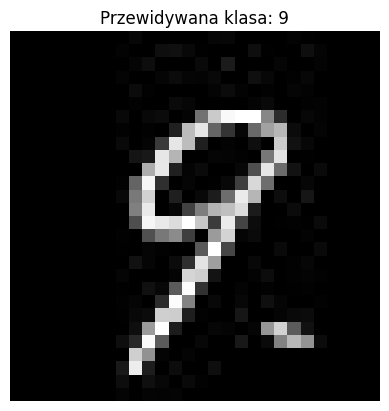

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 1. Wczytaj dane MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. Przetwórz dane
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Normalizacja
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0    # Normalizacja
y_train = to_categorical(y_train, 10)  # One-hot encoding etykiet
y_test = to_categorical(y_test, 10)    # One-hot encoding etykiet

# 3. Zbuduj najprostszą sieć CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Warstwa konwolucyjna
    MaxPooling2D(pool_size=(2, 2)),                                  # Warstwa maksymalnego spooling'u
    Flatten(),                                                       # Spłaszczenie
    Dense(128, activation='relu'),                                   # Warstwa w pełni połączona
    Dense(10, activation='softmax')                                  # Warstwa wyjściowa (10 klas)
])

# 4. Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Trenowanie modelu
model.fit(X_train, y_train, epochs=5, batch_size=32)

# 6. Ewaluacja modelu
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Dokładność na zbiorze testowym: {accuracy * 100:.2f}%")

# 7. Testowanie pojedynczego obrazu
def test_single_image(image_path):
    # Wczytaj obraz i przetwórz go
    img = Image.open(image_path).convert('L')  # Konwersja do skali szarości
    img = img.resize((28, 28))                 # Zmiana rozmiaru na 28x28
    img_array = np.array(img).astype('float32') / 255.0  # Normalizacja
    img_array = img_array.reshape(1, 28, 28, 1)          # Dopasowanie wymiarów

    # Przewidywanie klasy
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Wyświetlenie obrazu i wyniku
    plt.imshow(img, cmap='gray')
    plt.title(f"Przewidywana klasa: {predicted_class}")
    plt.axis('off')
    plt.show()

# Wywołanie funkcji testującej
image_path = "Images/sample_image.png"  # Podaj ścieżkę do obrazu testowego
test_single_image(image_path)
